<a href="https://colab.research.google.com/github/seungeunlee00/JUNIA/blob/main/AI/Linear_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Learning(지도학습)
> 정답을 알려주면서 진행하는 학습

> 데이터와 레이블(정답)이 함께 제공됨

지도학습 모델 종류
> Classification (분류 모델):
레이블의 값들이 이산적으로 나눠질 수 있는 문제에 사용

> Regression (예측 모델, 회귀 모델):
레이블의 값들이 연속적인 문제에 사용

# **Linear Regression(선형 회귀)**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]) # data
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
y # lable(정답, 실제값)

array([ 6,  8,  9, 11])

In [ ]:
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y) # 성능 평가

1.0

In [ ]:
reg.coef_ # coefficient: 계수, 가중치

array([1., 2.])

In [ ]:
reg.intercept_ # intercept: 절편, 편향

3.0000000000000018

y = 1 * x0 + 2 * x1 + 3라는 선형 회귀 모델을 얻을 수 있음

In [ ]:
reg.predict(np.array([[3, 5]]))
# 1 * 3 + 2 * 5 + 3 = 16

array([16.])

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


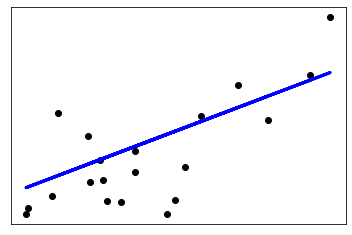

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**Confusion Matrix**

TP: True를 True로 예측(정답)

TN: False를 False로 예측(정답)

FP: False를 True로 예측(오답)

FN: True를 False로 예측(오답)

맞느냐 틀렸느냐 -> T N <- 예측한 값

> Precision(정밀도)=TP/(TP+FP): 모델이 True라고 분류한 것 중에서 실제로 True인 것의 비율

> Recall(재현율)=TP/(TP+FN): 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율

> Accurancy(정확도)=(TP+TN)/(TP+FN+FP+TN)
: 가장 직관적으로 모델의 성능을 나타낼 수 있는 평가 지표

In [ ]:
코드

**Decision Tree - Iris Classification**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

iris=datasets.load_iris()
x=iris.data
y=iris.target

# spilitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)

# build the model
classifier=tree.DecisionTreeClassifier()

# train the model
classifier.fit(x_train,y_train)

# make predictions
predictions=classifier.predict(x_test)
print("Accuracy: " + str(accuracy_score(y_test,predictions)))

Accuracy: 0.96


# **Linear and Polynomial Regression**
    
Linear :

y = -0.052x + 62.561

Polynomial with deg 2

y = 0.0214x2 - 2.1948x + 96,306

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
f=open('/content/drive/MyDrive/Colab Notebooks/JUNIA/AI/regression-example-data.csv') # 드라이브 마운트 필수
data=np.loadtxt(f, delimiter=";")
print(data.shape)

(150, 2)


In [ ]:
X=data[:,0] # first column
Y=data[:,1] # second column

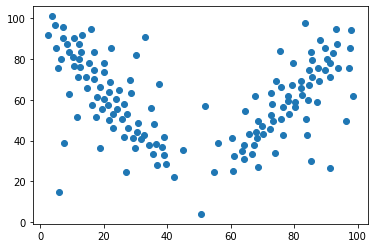

In [ ]:
plt.scatter (X, Y)

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
print (X)

[84.359  72.8205 96.4103  7.1795 10.2564  5.8974 76.4103 75.641  73.3333
 21.5385 38.9744 18.9744 16.9231 85.3846  9.2308 34.359  89.7436 10.5128
 15.8974 80.2564 85.641   7.4359 30.2564 76.4103  6.6667 19.4872 31.7949
 93.3333 15.3846 73.0769 82.3077 13.0769 12.5641 55.8974 91.2821 34.8718
 24.1026 11.7949 79.7436 68.7179 90.2564 12.8205 38.4615 16.4103 87.4359
 11.5385 98.4615 33.0769 26.4103  5.641   9.2308 91.2821 38.9744 83.8462
 84.6154 68.7179 12.3077 28.7179 27.4359 75.8974 12.3077 89.7436 20.2564
 18.9744 83.5897 50.7692 97.9487 22.8205 68.2051 16.9231 21.7949 30.7692
 16.9231 54.8718 85.3846 78.2051 39.7436 92.3077 42.3077 78.2051 91.2821
 20.     36.9231 74.359  67.6923 10.7692 84.1026 75.8974 93.8462 73.8462
  7.1795 87.1795 60.5128  3.5897 14.359  65.8974 70.     80.2564 24.8718
 35.641  64.1026 60.7692 84.6154 17.6923 21.2821 64.6154 30.5128 70.2564
 27.1795 82.0513 26.4103  8.4615 52.0513 36.4103 22.3077 17.9487 44.8718
 29.7436 27.6923 63.5897 67.4359 14.6154 72.8205 28

In [ ]:
print (X.shape)

(150,)


In [ ]:
# convert X from 1D to 2D
X = X.reshape(-1, 1) # reshape(150, 1)과 동일 (-1은 배열의 길이인 150을 모를 때 알아서 추측해라~라는 뜻)
print (X)

[[84.359 ]
 [72.8205]
 [96.4103]
 [ 7.1795]
 [10.2564]
 [ 5.8974]
 [76.4103]
 [75.641 ]
 [73.3333]
 [21.5385]
 [38.9744]
 [18.9744]
 [16.9231]
 [85.3846]
 [ 9.2308]
 [34.359 ]
 [89.7436]
 [10.5128]
 [15.8974]
 [80.2564]
 [85.641 ]
 [ 7.4359]
 [30.2564]
 [76.4103]
 [ 6.6667]
 [19.4872]
 [31.7949]
 [93.3333]
 [15.3846]
 [73.0769]
 [82.3077]
 [13.0769]
 [12.5641]
 [55.8974]
 [91.2821]
 [34.8718]
 [24.1026]
 [11.7949]
 [79.7436]
 [68.7179]
 [90.2564]
 [12.8205]
 [38.4615]
 [16.4103]
 [87.4359]
 [11.5385]
 [98.4615]
 [33.0769]
 [26.4103]
 [ 5.641 ]
 [ 9.2308]
 [91.2821]
 [38.9744]
 [83.8462]
 [84.6154]
 [68.7179]
 [12.3077]
 [28.7179]
 [27.4359]
 [75.8974]
 [12.3077]
 [89.7436]
 [20.2564]
 [18.9744]
 [83.5897]
 [50.7692]
 [97.9487]
 [22.8205]
 [68.2051]
 [16.9231]
 [21.7949]
 [30.7692]
 [16.9231]
 [54.8718]
 [85.3846]
 [78.2051]
 [39.7436]
 [92.3077]
 [42.3077]
 [78.2051]
 [91.2821]
 [20.    ]
 [36.9231]
 [74.359 ]
 [67.6923]
 [10.7692]
 [84.1026]
 [75.8974]
 [93.8462]
 [73.8462]
 [ 7.1795]

In [ ]:
reg.fit(X,Y)

LinearRegression()

In [ ]:
reg.coef_ # coefficient: 계수, 가중치

array([-0.05203966])

In [ ]:
reg.intercept_ # intercept: 절편, 편향

62.5612467676423

In [ ]:
Y_predicted = reg.predict(X)

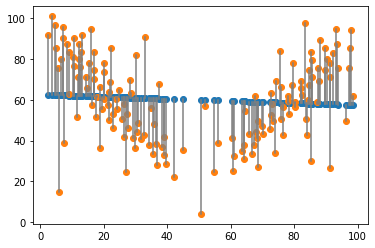

In [ ]:
for i in range (X.size):
    plt.plot( (X[i],X[i]) , (Y[i],Y_predicted[i]) ,c='gray')
    
plt.scatter (X, Y_predicted)
plt.scatter (X, Y)

y = -0.052x + 62.561라는 선형 회귀 모델을 얻을 수 있음 (엑셀 추세선 식과 동일)

# **Polynomial Model**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

poly = make_pipeline(PolynomialFeatures(degree=2), Ridge())
poly.fit(X, Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [ ]:
poly.predict([[150],[50]])

array([247.98385251,  40.00563744])

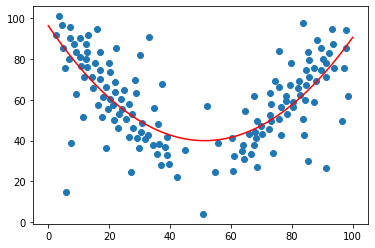

In [ ]:
#for i in range (X.size):
#    plt.plot( (X[i],X[i]) , (Y[i],Y_predicted_poly[i]) ,c='gray')
    
plt.scatter (X, Y)

# This time we choose to display a line instead of a set of predicted points
x_plot = np.linspace(0, 100, 100)
X_plot = x_plot[:, np.newaxis]  # Same as reshape(-1,1)
Y_predicted_poly = poly.predict(X_plot)

plt.plot (X_plot, Y_predicted_poly, c="red")

In [ ]:
poly.steps[1][1].coef_

array([ 0.        , -2.19443643,  0.02137109])

In [ ]:
poly.steps[1][1].intercept_

96.29972660444793

# **Exercice** :
Split the data into two groups (X<50 and X>=50) and apply a linear regression for each group.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

f=open('/content/drive/MyDrive/Colab Notebooks/JUNIA/AI/regression-example-data.csv') # 드라이브 마운트 필수
data=np.loadtxt(f, delimiter=";")
print(data.shape)

(150, 2)


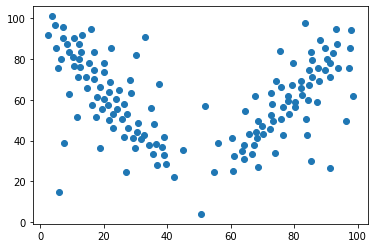

In [ ]:
X=data[:,0] # first column
Y=data[:,1] # second column

plt.scatter (X, Y)

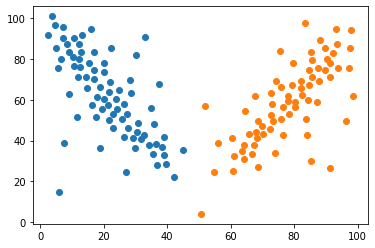

In [ ]:
X_small = X[X<50] # Split the data
X_large = X[X>=50]

Y_small = Y[X<50]
Y_large = Y[X>=50]

plt.scatter(X_small, Y_small)
plt.scatter(X_large, Y_large)

In [ ]:
reg = linear_model.LinearRegression() # build the model

In [ ]:
X_small = X_small.reshape(-1, 1) # convert X from 1D to 2D
X_large = X_large.reshape(-1, 1)

In [ ]:
reg.fit(X_small, Y_small) # train the model

LinearRegression()

In [ ]:
reg.score(X_small, Y_small) # 성능 평가

89.01906339020276

In [ ]:
reg.coef_ # coefficient: 계수, 가중치

array([-1.27273539])

In [ ]:
reg.intercept_ # intercept: 절편, 편향

89.01906339020276

In [ ]:
Y_small_predicted = reg.predict(X_small) # make predictions

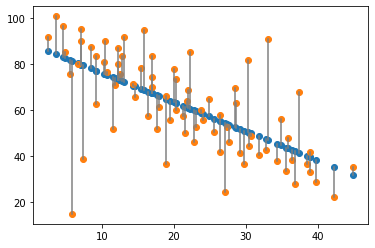

In [ ]:
for i in range (X_small.size):
    plt.plot( (X_small[i],X_small[i]) , (Y_small[i],Y_small_predicted[i]) ,c='gray')
    
plt.scatter (X_small, Y_small_predicted)
plt.scatter (X_small, Y_small)

In [ ]:
reg.fit(X_large, Y_large) # train the model

LinearRegression()

In [ ]:
reg.score(X_large, Y_large) # 성능 평가

0.5005742216517542

In [ ]:
reg.coef_ # coefficient: 계수, 가중치

array([1.193187])

In [ ]:
reg.intercept_ # intercept: 절편, 편향

-35.17121540636472

In [ ]:
Y_large_predicted = reg.predict(X_large) # make predictions

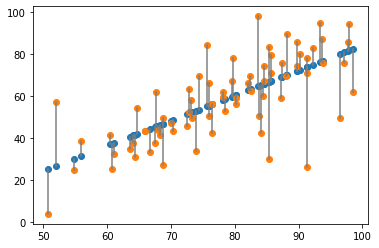

In [ ]:
for i in range(X_large.size):
  plt.plot((X_large[i], X_large[i]), (Y_large[i], Y_large_predicted[i]), c='gray')

plt.scatter (X_large, Y_large_predicted)
plt.scatter (X_large, Y_large)